In [23]:
import requests
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import datetime as dt
import pandas as pd
from matplotlib import style
from sklearn.linear_model import LinearRegression

In [24]:
ticker = 'AAPL'
api_key = "ec2d6f3b0cc9395fbce02f1316669229"
years = 10


url = (f"https://financialmodelingprep.com/api/v3/balance-sheet-statement/{ticker}?limit={years}&apikey={api_key}")

r = requests.get(url)
balance_sheet = r.json()


In [25]:
url1 = (f"https://financialmodelingprep.com/api/v4/shares_float/{ticker}&apikey={api_key}")
f = requests.get(url1)

shares_float = f.json()


In [26]:
df_balance_sheet = pd.DataFrame(balance_sheet)

In [27]:
df_balance_sheet.head()

,date,symbol,reportedCurrency,cik,fillingDate,acceptedDate,calendarYear,period,cashAndCashEquivalents,shortTermInvestments,...,totalStockholdersEquity,totalEquity,totalLiabilitiesAndStockholdersEquity,minorityInterest,totalLiabilitiesAndTotalEquity,totalInvestments,totalDebt,netDebt,link,finalLink
0,2023-09-30,AAPL,USD,0000320193,2023-11-03,2023-11-02 18:08:27,2023,FY,29965000000,31590000000,...,62146000000,62146000000,352583000000,0,352583000000,132134000000,122355000000,92390000000,https://www.sec.gov/Archives/edgar/data/320193...,https://www.sec.gov/Archives/edgar/data/320193...
1,2022-09-24,AAPL,USD,0000320193,2022-10-28,2022-10-27 18:01:14,2022,FY,23646000000,24658000000,...,50672000000,50672000000,352755000000,0,352755000000,145463000000,120069000000,96423000000,https://www.sec.gov/Archives/edgar/data/320193...,https://www.sec.gov/Archives/edgar/data/320193...
2,2021-09-25,AAPL,USD,0000320193,2021-10-29,2021-10-28 18:04:28,2021,FY,34940000000,27699000000,...,63090000000,63090000000,351002000000,0,351002000000,155576000000,124719000000,89779000000,https://www.sec.gov/Archives/edgar/data/320193...,https://www.sec.gov/Archives/edgar/data/320193...
3,2020-09-26,AAPL,USD,0000320193,2020-10-30,2020-10-29 18:06:25,2020,FY,38016000000,52927000000,...,65339000000,65339000000,323888000000,0,323888000000,153814000000,112436000000,74420000000,https://www.sec.gov/Archives/edgar/data/320193...,https://www.sec.gov/Archives/edgar/data/320193...
4,2019-09-28,AAPL,USD,0000320193,2019-10-31,2019-10-30 18:12:36,2019,FY,48844000000,51713000000,...,90488000000,90488000000,338516000000,0,338516000000,157054000000,108047000000,59203000000,https://www.sec.gov/Archives/edgar/data/320193...,https://www.sec.gov/Archives/edgar/data/320193...


In [28]:
df_balance_sheet.describe()

,cashAndCashEquivalents,shortTermInvestments,cashAndShortTermInvestments,netReceivables,inventory,otherCurrentAssets,totalCurrentAssets,propertyPlantEquipmentNet,goodwill,intangibleAssets,...,accumulatedOtherComprehensiveIncomeLoss,othertotalStockholdersEquity,totalStockholdersEquity,totalEquity,totalLiabilitiesAndStockholdersEquity,minorityInterest,totalLiabilitiesAndTotalEquity,totalInvestments,totalDebt,netDebt
count,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.0,5.0,...,5.000000e+00,5.0,5.000000e+00,5.000000e+00,5.000000e+00,5.0,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00
mean,3.508220e+10,3.771740e+10,7.279960e+10,5.133440e+10,5.204800e+09,1.472900e+10,1.440678e+11,4.201540e+10,0.0,0.0,...,-4.677600e+09,0.0,6.634700e+10,6.634700e+10,3.437488e+11,0.0,3.437488e+11,1.488082e+11,1.175252e+11,8.244300e+10
std,9.420549e+09,1.356162e+10,2.196229e+10,1.010913e+10,1.198136e+09,3.879803e+09,1.131653e+10,7.219576e+09,0.0,0.0,...,6.035125e+09,0.0,1.464382e+10,1.464382e+10,1.258568e+10,0.0,1.258568e+10,1.034497e+10,7.022907e+09,1.543265e+10
min,2.364600e+10,2.465800e+10,4.830400e+10,3.744500e+10,4.061000e+09,1.126400e+10,1.348360e+11,3.676600e+10,0.0,0.0,...,-1.145200e+10,0.0,5.067200e+10,5.067200e+10,3.238880e+11,0.0,3.238880e+11,1.321340e+11,1.080470e+11,5.920300e+10
25%,2.996500e+10,2.769900e+10,6.155500e+10,4.580400e+10,4.106000e+09,1.235200e+10,1.354050e+11,3.737800e+10,0.0,0.0,...,-1.110900e+10,0.0,6.214600e+10,6.214600e+10,3.385160e+11,0.0,3.385160e+11,1.454630e+11,1.124360e+11,7.442000e+10
50%,3.494000e+10,3.159000e+10,6.263900e+10,5.150600e+10,4.946000e+09,1.411100e+10,1.435660e+11,3.944000e+10,0.0,0.0,...,-5.840000e+08,0.0,6.309000e+10,6.309000e+10,3.510020e+11,0.0,3.510020e+11,1.538140e+11,1.200690e+11,8.977900e+10
75%,3.801600e+10,5.171300e+10,9.094300e+10,6.093200e+10,6.331000e+09,1.469500e+10,1.437130e+11,4.211700e+10,0.0,0.0,...,-4.060000e+08,0.0,6.533900e+10,6.533900e+10,3.525830e+11,0.0,3.525830e+11,1.555760e+11,1.223550e+11,9.239000e+10
max,4.884400e+10,5.292700e+10,1.005570e+11,6.098500e+10,6.580000e+09,2.122300e+10,1.628190e+11,5.437600e+10,0.0,0.0,...,1.630000e+08,0.0,9.048800e+10,9.048800e+10,3.527550e+11,0.0,3.527550e+11,1.570540e+11,1.247190e+11,9.642300e+10


In [76]:
#change in debt 
for index, row in df_balance_sheet.iterrows():
    total_debt = row['totalDebt']
    date = row['date']
    print(date, total_debt)    

print()    
PC2019_2020 = (df_balance_sheet['totalDebt'][3] - df_balance_sheet['totalDebt'][4])/df_balance_sheet['totalDebt'][3] * 100
print(f'Debt Change Percentage from 2019-2020:{PC2019_2020:.2f}%')

PC2020_2021 = (df_balance_sheet['totalDebt'][2] - df_balance_sheet['totalDebt'][3])/df_balance_sheet['totalDebt'][2]*100
print(f'Debt Change Percentage from 2020-2021:{PC2020_2021:.2f}%')

PC2021_2022 =  (df_balance_sheet['totalDebt'][1] - df_balance_sheet['totalDebt'][2])/df_balance_sheet['totalDebt'][1]*100
print(f'Debt Change Percentage from 2021-2022:{PC2021_2022:.2f}%')

PC2022_2023 =  (df_balance_sheet['totalDebt'][0] - df_balance_sheet['totalDebt'][1])/df_balance_sheet['totalDebt'][0]*100
print(f'Debt Change Percentage from 2022-2023:{PC2022_2023:.2f}%')

    
    

2023-09-30 122355000000
2022-09-24 120069000000
2021-09-25 124719000000
2020-09-26 112436000000
2019-09-28 108047000000

Debt Change Percentage from 2019-2020:3.90%
Debt Change Percentage from 2020-2021:9.85%
Debt Change Percentage from 2021-2022:-3.87%
Debt Change Percentage from 2022-2023:1.87%


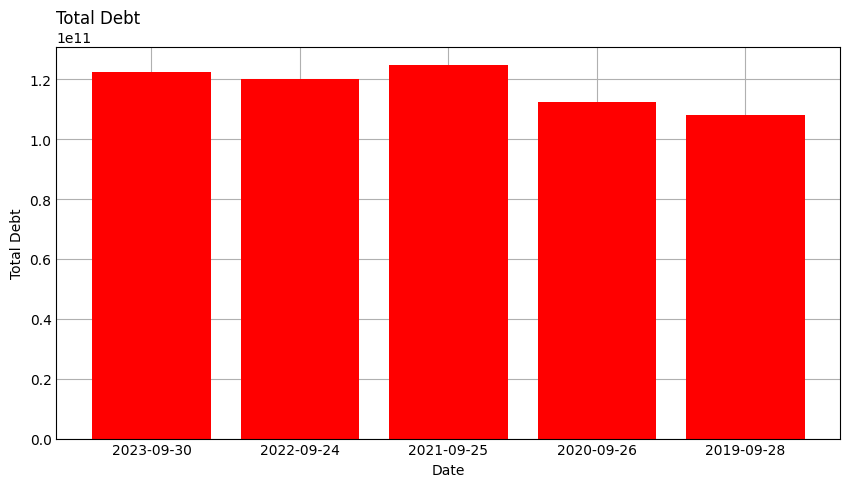

In [77]:
plt.figure(figsize=(8,4))
x = df_balance_sheet['date']
y = df_balance_sheet['totalDebt']

plt.xlabel('Date')
plt.ylabel('Total Debt')
plt.title('Total Debt', loc='left')

plt.bar(x,y, color='red')
plt.show()

## Debt ratio
Debt Ratios
- Amount of debt a company has in relation to it's assets
- The Debt to Ratio tells us the degree of leverage used by the company


In [7]:
for index, row in df_balance_sheet.iterrows():
    total_assets = row['totalAssets']
    total_liabilities = row['totalLiabilities']
    print()
    debt_ratio = total_liabilities / total_assets
    if debt_ratio <= 0.4:
        print(f'The Company has more assets than debt {debt_ratio:.2f}')
    else:
        print(f'The Company has more debt than Asset {debt_ratio:.2f}')
    print(f'Total Assets:{total_assets}, Total Liabilities:{total_liabilities}')



The Company has more debt than Asset 0.82
Total Assets:352583000000, Total Liabilities:290437000000

The Company has more debt than Asset 0.86
Total Assets:352755000000, Total Liabilities:302083000000

The Company has more debt than Asset 0.82
Total Assets:351002000000, Total Liabilities:287912000000

The Company has more debt than Asset 0.80
Total Assets:323888000000, Total Liabilities:258549000000

The Company has more debt than Asset 0.73
Total Assets:338516000000, Total Liabilities:248028000000


## Debt to Equity ratio
- This is a measurement of the percentage of the company’s balance sheet that is financed by suppliers, lenders, creditors and obligors versus what the shareholders have committed.
- Amount of debt a company has in relation to its equity
- The Lower the ratio, the less the debt compared to equity
- Whether or not a debt ratio is "good" depends on the context: the company's industrial sector, the current interest rate, and so on.

In [8]:
for index, row in df_balance_sheet.iterrows():
    total_debt = row['totalDebt']
    total_equity = row['totalEquity']
    print()
    debt_to_equity = total_debt / total_equity
    if debt_to_equity <= 0.4:
        print(f'Good Debt to Equity Ratio: {debt_to_equity:.2f}')
    else:
        print(f'It is not a healthy ratio: {debt_to_equity},  ')
    print(f'Total Debt: {total_debt}, Total Equity: {total_equity}')


It is not a healthy ratio: 1.7875325845589418,  
Total Debt: 111088000000, Total Equity: 62146000000

It is not a healthy ratio: 2.3695334701610355,  
Total Debt: 120069000000, Total Equity: 50672000000

It is not a healthy ratio: 1.9768426058012363,  
Total Debt: 124719000000, Total Equity: 63090000000

It is not a healthy ratio: 1.720809929750991,  
Total Debt: 112436000000, Total Equity: 65339000000

It is not a healthy ratio: 1.1940478295464592,  
Total Debt: 108047000000, Total Equity: 90488000000


## Equity Multiplier
- Measures the proportion of a company's assets that ate financed trough debt versus equity
- A high equity multiplier mean that the company is relying more on debt to finance its assets rather than equity
- A lower equity multiplier suggests that a company's financial leverage is lower. In general, a low equity multiplier indicates that a corporation is not assuming excessive debt to finance its assets.

In [9]:
for index, row in df_balance_sheet.iterrows():
    total_assets = row['totalAssets']
    total_equity = row['totalEquity']
    print()
    equity_multiplier = total_assets / total_equity
    print(f'Total Assets: {total_assets}, Total Equity: {total_equity}')
    print(f'Total assets are approximately {equity_multiplier:.2f} times its total equity.')



Total Assets: 352583000000, Total Equity: 62146000000
Total assets are approximately 5.67 times its total equity.

Total Assets: 352755000000, Total Equity: 50672000000
Total assets are approximately 6.96 times its total equity.

Total Assets: 351002000000, Total Equity: 63090000000
Total assets are approximately 5.56 times its total equity.

Total Assets: 323888000000, Total Equity: 65339000000
Total assets are approximately 4.96 times its total equity.

Total Assets: 338516000000, Total Equity: 90488000000
Total assets are approximately 3.74 times its total equity.


## Quick Ratio

-Assesses a company's short-term liquidity and ability to meet its immediate obligations


In [10]:
for index, row in df_balance_sheet.iterrows():
    current_assets = row['totalCurrentAssets']
    inventory = row['inventory']
    current_liabilities = row['totalCurrentLiabilities']
    print()
    quick_ratio = (current_assets - inventory) / current_liabilities
    print(f'Total Current Assets: {current_assets}, Total Current Liabilities: {current_liabilities}, Inventory: {inventory}')
    print(f'Quick Ratio:{quick_ratio:.2f}')
    if quick_ratio > 1:
        print(f'The company has sufficient liquidity to cover current liabilities')
    else:
       print('Might have liquidity Problems')


Total Current Assets: 143566000000, Total Current Liabilities: 145308000000, Inventory: 6331000000
Quick Ratio:0.94
Might have liquidity Problems

Total Current Assets: 135405000000, Total Current Liabilities: 153982000000, Inventory: 4946000000
Quick Ratio:0.85
Might have liquidity Problems

Total Current Assets: 134836000000, Total Current Liabilities: 125481000000, Inventory: 6580000000
Quick Ratio:1.02
The company has sufficient liquidity to cover current liabilities

Total Current Assets: 143713000000, Total Current Liabilities: 105392000000, Inventory: 4061000000
Quick Ratio:1.33
The company has sufficient liquidity to cover current liabilities

Total Current Assets: 162819000000, Total Current Liabilities: 105718000000, Inventory: 4106000000
Quick Ratio:1.50
The company has sufficient liquidity to cover current liabilities


## Current Ratio

- The current ratio is a liquidity ratio that measures a company’s ability to pay short-term obligations
- A current ratio of 1.0 or greater is an indicator that the company is well-positioned to cover its current or short-term Liabilities

In [11]:
for index, row, in df_balance_sheet.iterrows():
    current_assets = row['totalCurrentAssets']
    current_liabilities = row['totalCurrentLiabilities']
    date = row['date']
    print()
    current_ratio = current_assets / current_liabilities
    print(date)
    print(f'Total Current Assets: {current_assets}, Total Current Liabilities: {current_liabilities}')
    print(f'Current Ratio: {current_ratio:.2f}')



2023-09-30
Total Current Assets: 143566000000, Total Current Liabilities: 145308000000
Current Ratio: 0.99

2022-09-24
Total Current Assets: 135405000000, Total Current Liabilities: 153982000000
Current Ratio: 0.88

2021-09-25
Total Current Assets: 134836000000, Total Current Liabilities: 125481000000
Current Ratio: 1.07

2020-09-26
Total Current Assets: 143713000000, Total Current Liabilities: 105392000000
Current Ratio: 1.36

2019-09-28
Total Current Assets: 162819000000, Total Current Liabilities: 105718000000
Current Ratio: 1.54


## Net Working Capital

In [12]:
# current assets - current Liabilities / total Assets
for index, row, in df_balance_sheet.iterrows():
    current_assets = row['totalCurrentAssets']
    current_liabilities = row['totalCurrentLiabilities']
    total_assets = row['totalAssets']
    print()
    NWC = (current_assets - current_liabilities) / total_assets
    print(f'Total Current Assets: {current_assets}, Total Current Liabilities: {current_liabilities}, Total Assets: {total_assets}')
    print(f'Net Working Capital {NWC: .2f}')


Total Current Assets: 143566000000, Total Current Liabilities: 145308000000, Total Assets: 352583000000
Net Working Capital -0.00

Total Current Assets: 135405000000, Total Current Liabilities: 153982000000, Total Assets: 352755000000
Net Working Capital -0.05

Total Current Assets: 134836000000, Total Current Liabilities: 125481000000, Total Assets: 351002000000
Net Working Capital  0.03

Total Current Assets: 143713000000, Total Current Liabilities: 105392000000, Total Assets: 323888000000
Net Working Capital  0.12

Total Current Assets: 162819000000, Total Current Liabilities: 105718000000, Total Assets: 338516000000
Net Working Capital  0.17


## Total Debt - to - Capitalization Ratio
* The total amount of debt in relation to company's total capitalization
* The lower ratio the less your business is capitalized using debt

In [13]:
def tdebt_to_cap(total_debt, shareholders_equity):
    return total_debt / (total_debt + shareholders_equity)

for index, row in df_balance_sheet.iterrows():
    total_debt = row['totalDebt']
    shareholders_equity = row['totalStockholdersEquity']

    result = tdebt_to_cap(total_debt, shareholders_equity)
    print(f'Total Debt to Capitalization ratio: {result}')

Total Debt to Capitalization ratio: 0.6412597988847455
Total Debt to Capitalization ratio: 0.7032230102904399
Total Debt to Capitalization ratio: 0.6640736066961648
Total Debt to Capitalization ratio: 0.6324623822247223
Total Debt to Capitalization ratio: 0.5442214219155312


## Cash Flow Projection

* Opening Balance -> Starting cash balance for the projection period
* Revenue
* Investments

In [14]:
df_balance_sheet['date'] = pd.to_datetime(df_balance_sheet['date'])
df_balance_sheet = df_balance_sheet.sort_values(by = 'date')

df_balance_sheet['year'] = df_balance_sheet['date'].dt.year

years = df_balance_sheet['year'].values.reshape(-1,1)
cash_and_cash_equivalents = df_balance_sheet['cashAndCashEquivalents'].values

CACE_model = LinearRegression().fit(years, cash_and_cash_equivalents)


future_years = np.array([2023, 2024, 2025]).reshape(-1,1)
predicted_CACE = CACE_model.predict(future_years)

for year, caec in zip(future_years, predicted_CACE):
     print(f"Year: {year[0]}")
     print(f'Predicted Cash and Equivalents: {caec:.2f}')
     print("-----")

Year: 2023
Predicted Cash and Equivalents: 24656600000.00
-----
Year: 2024
Predicted Cash and Equivalents: 19443800000.00
-----
Year: 2025
Predicted Cash and Equivalents: 14231000000.00
-----


In [15]:
#For DCF
total_debt = df_balance_sheet['totalDebt'][0]


print(total_debt)


111088000000


In [16]:
cash = df_balance_sheet['cashAndCashEquivalents'][0]

print(cash)

29965000000


In [17]:
print(total_equity)

90488000000
